#### This is a notebook about analyzing music files
<n>
To install the PyAudio package follow these instructions:
https://stackoverflow.com/questions/33851379/pyaudio-installation-on-mac-python-3

<n>
This notebook contains various experiments with reading and analyzing audio

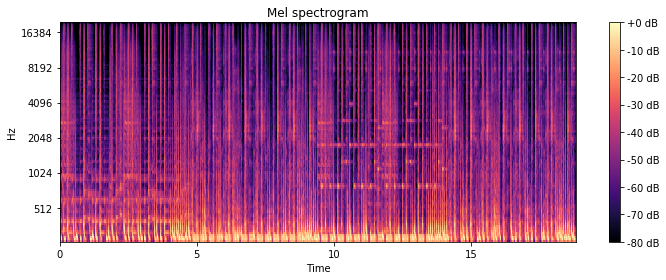

In [2]:
# Create a spectrogram using Mel cepstral filter

# From Wikipedia: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
# In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum
# of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

# The code below is from http://cs231n.stanford.edu/reports/2017/pdfs/22.pdf

%matplotlib inline

import librosa
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# The librosa.display module needs to be explicitly imported (https://github.com/librosa/librosa/issues/441)
import librosa.display


files_location = "C:/Users/bre49823/GitRepo/MusicEngine/"
song_id = "dt_16bars_102rap"

song_path = files_location + song_id + ".wav"

y , sr = librosa.load(song_path, mono = True)

# Create Mel spectrogram
M = librosa.feature.melspectrogram(
    y = y,
    sr = sr,
    n_mels = 128,
    n_fft = 2048,
    hop_length = 1024)

spectogram = librosa.power_to_db(
    M , ref = np.max)

# Plot Mel spectrogram
plt.figure(figsize = (10, 4))
librosa.display.specshow(spectogram,
                         y_axis = 'mel', fmax = 20000,
                         x_axis = 'time')
plt.colorbar(format = '%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


In [1]:
# Create Fourier transformation on the WAV file
# source: https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files

import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fft
from scipy.io import wavfile

%matplotlib inline

files_location = "C:/Users/bre49823/GitRepo/MusicEngine/"
song_id = "dt_16bars_102rap"

# Returns the sample rate (in samples/sec) and data from a WAV file
fs, data = wavfile.read(files_location + song_id + ".wav")

a = data.T[0]                                     # this is a two channel soundtrack, I get the first track

# this is 8-bit track, b is now normalized on [-1,1) -> !!! - How to figure out if it's 8- or 16-bit ????
b = [(ele / 2 ** 8.) * 2 - 1 for ele in a]        
min(b), max(b)

c = scipy.fftpack.fft(b)                          # calculate fourier transform (complex numbers list)
d = len(c)/2                                      # you only need half of the fft list (real signal symmetry)

# Data exploration
print(fs)                                # Sampling rate
print(data.T.shape)                      
print(data.T[0].min(), data.T[0].max())  # min and max values for channel 1
print(data.T[1].min(), data.T[1].max())  # min and max values for channel 2


# Plot the input signal here (from https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize(16, 5))
#ax1.plot(x); ax1.set_title("Raw Audio Signal")
#ax2.specgram(x); ax2.set_title("Spectrogram");


# Plot of spectrogram
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()


# For the correct output, convert the xlabelto the frequency for the spectrum plot
k = scipy.arange(len(data))
T = len(data)/fs  # where fs is the sampling frequency
frqLabel = k/T


44100
(2, 1661950)
-32647 32624
-32681 32528


NameError: name 'figsize' is not defined

In [8]:
# Experiment with reading and writing a file

import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy.io import wavfile

files_location = "C:/Users/bre49823/GitRepo/MusicEngine/"
song_id = "dt_16bars_102rap"

# Returns the sample rate (in samples/sec) and data from a WAV file
fs, data = wavfile.read(files_location + song_id + ".wav")

print(fs)
print(data.T.shape)
print(data.T[0].min(), data.T[0].max())
print(data.T[1].min(), data.T[1].max())




wavfile.write(files_location + "test" + ".wav", 44100, data[:,0])

44100
(2, 1661950)
-32647 32624
-32681 32528


In [9]:
data

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ..., 
       [  1,   1],
       [-98, -98],
       [ 13,  12]], dtype=int16)

In [24]:
data[:,0]

array([  0,   0,   0, ...,   1, -98,  13], dtype=int16)

In [ ]:
import matplotlib.pyplot as plt
import scipy
from scipy import io

%matplotlib inline

files_location = "C:/Users/bre49823/GitRepo/MusicEngine/"
song_id = "dt_16bars_102rap"

# Returns the sample rate (in samples/sec) and data from a WAV file
fs, data = io.wavfile.read(files_location + song_id + ".wav")

In [ ]:
from numpy.fft import fft, fftshift
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

window = np.hanning(120)
plt.plot(window)

In [ ]:
# https://stackoverflow.com/questions/2648151/python-frequency-detection
  
# Read in a WAV and find the freq's
import pyaudio
import wave
import numpy as np

chunk = 2048

# open up a wave
wf = wave.open('test-tones/440hz.wav', 'rb')
swidth = wf.getsampwidth()
RATE = wf.getframerate()
# use a Blackman window
window = np.blackman(chunk)
# open stream
p = pyaudio.PyAudio()
stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = RATE,
                output = True)

# read some data
data = wf.readframes(chunk)
# play stream and find the frequency of each chunk
while len(data) == chunk*swidth:
    # write data out to the audio stream
    stream.write(data)
    # unpack the data and times by the hamming window
    indata = np.array(wave.struct.unpack("%dh"%(len(data)/swidth),\
                                         data))*window
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    else:
        thefreq = which*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    # read some more data
    data = wf.readframes(chunk)
if data:
    stream.write(data)
stream.close()
p.terminate()



In [1]:
# Extract features from WAV file
# source: https://stackoverflow.com/questions/34742225/how-to-extract-data-from-a-wav-file-using-python-matplotlib-library

""" This work is licensed under a Creative Commons Attribution 3.0 Unported License.
Frank Zalkow, 2012-2013 """

import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac = 0.5, window = np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize / 2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape = (cols, frameSize), strides = (samples.strides[0] * hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    


""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr = 44100, factor = 20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins - 1) / max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):
        if i == len(scale) - 1:
            newspec[:,i] = np.sum(spec[:, scale[i]:], axis = 1)
        else:        
            newspec[:,i] = np.sum(spec[:, scale[i]:scale[i + 1]], axis = 1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins * 2, 1. / sr)[: freqbins + 1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale) - 1:
            freqs += [np.mean(allfreqs[scale[i]:])]
        else:
            freqs += [np.mean(allfreqs[scale[i]:scale[i + 1]])]

    return newspec, freqs


""" plot spectrogram"""
def plotstft(audiopath, binsize = 2 ** 10, plotpath = None, colormap = "jet"):
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor = 1.0, sr = samplerate)
    ims = 20. * np.log10(np.abs(sshow) / 10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    plt.figure(figsize = (15, 7.5))
    plt.imshow(np.transpose(ims), origin = "lower", aspect = "auto", cmap = colormap, interpolation = "none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins - 1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins - 1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs * len(samples) / timebins) + (0.5 * binsize)) / samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins - 1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches = "tight")
    else:
        plt.show()

    plt.clf()


    
    
files_location = "/Users/valentin/Documents/MusicEngine/wav/"
song_id = "TARGET_Biz_Amulet"

plotstft(files_location + song_id + ".wav")

TypeError: 'numpy.float64' object cannot be interpreted as an integer